# Analyse de la performance économique de la Côte d'Ivoire (2010-2023)

1.  importation des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2. Configuration de l'affichage

In [11]:
# Configuration de l'affichage
pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 6)

3. CHARGEMENT ET VERIFICATION DES DONNÉES

In [12]:
# 1. CHARGEMENT ET VERIFICATION DES DONNÉES
print("🇨🇮 ANALYSE DE LA CROISSANCE ÉCONOMIQUE IVOIRIENNE")
print("=" * 60)
df = pd.read_csv('../data/performance-economique-du-secteur-reel-de-2010-a-2023.csv')
print("1. 📊 DONNÉES CHARGÉES AVEC SUCCÈS")
print(f"   Dimensions : {df.shape[0]} lignes, {df.shape[1]} colonnes")
print("\n   Aperçu des données :")
print(df.head())
print("\n   Structure des données :")
print(df.info())

🇨🇮 ANALYSE DE LA CROISSANCE ÉCONOMIQUE IVOIRIENNE
1. 📊 DONNÉES CHARGÉES AVEC SUCCÈS
   Dimensions : 43 lignes, 3 colonnes

   Aperçu des données :
                Indicateurs  Années  fluctuations en pourcentage
0  Croissance du PIB réel %    2023                         7.20
1  Croissance du PIB réel %    2022                         6.90
2  Croissance du PIB réel %    2021                         7.40
3  Croissance du PIB réel %    2020                         2.00
4  Croissance du PIB réel %    2019                         6.20

   Structure des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Indicateurs                  43 non-null     object 
 1   Années                       43 non-null     int64  
 2   fluctuations en pourcentage  43 non-null     float64
dtypes: float64(1), int64(1), object(1)
mem

4. NETTOYAGE ET PRÉPARATION

In [13]:
print("\n2. 🧹 NETTOYAGE DES DONNÉES")
print(f"   Valeurs manquantes : {df.isnull().sum().sum()}")
print(f"   Doublons : {df.duplicated().sum()}")


2. 🧹 NETTOYAGE DES DONNÉES
   Valeurs manquantes : 0
   Doublons : 0


5. Renommer les colonnes pour plus de clarté

In [14]:
df.columns = ['indicateur', 'annee', 'taux_croissance']
print("\n   Nouvelles appellations des colonnes :")
print(df.columns.tolist())


   Nouvelles appellations des colonnes :
['indicateur', 'annee', 'taux_croissance']


6. Vérifier les valeurs uniques

In [15]:
print(f"\n   Indicateur unique : {df['indicateur'].unique()[0]}")
print(f"   Période analysée : {df['annee'].min()} - {df['annee'].max()}")


   Indicateur unique : Croissance du PIB réel %
   Période analysée : 2010 - 2024


7. ANALYSE STATISTIQUE

In [16]:
print("\n3. 📈 ANALYSE STATISTIQUE DE LA CROISSANCE")
croissance_stats = df['taux_croissance'].describe()
print(croissance_stats)


3. 📈 ANALYSE STATISTIQUE DE LA CROISSANCE
count   43.00
mean     9.14
std      8.32
min     -4.20
25%      2.20
50%      7.20
75%     14.85
max     27.40
Name: taux_croissance, dtype: float64


8. Calculs supplémentaires

In [18]:
moyenne_10ans = df[df['annee'] >= 2014]['taux_croissance'].mean()
print(f"\n   📅 Moyenne sur 09 ans (2014-2023) : {moyenne_10ans:.2f}%")


   📅 Moyenne sur 09 ans (2014-2023) : 10.15%


9. Identifier les meilleures et plus faibles performances

In [19]:
annee_meilleure = df.loc[df['taux_croissance'].idxmax()]
annee_faible = df.loc[df['taux_croissance'].idxmin()]
print(f"\n   🏆 Meilleure performance : {annee_meilleure['annee']} ({annee_meilleure['taux_croissance']}%)")
print(f"   ⚠️  Plus faible performance : {annee_faible['annee']} ({annee_faible['taux_croissance']}%)")


   🏆 Meilleure performance : 2023 (27.4%)
   ⚠️  Plus faible performance : 2011 (-4.2%)


10. VISUALISATIONS PROFESSIONNELLES


4. 🎨 CRÉATION DES VISUALISATIONS
   ✅ Graphique sauvegardé sous '../results/analyse_croissance_pib.png'


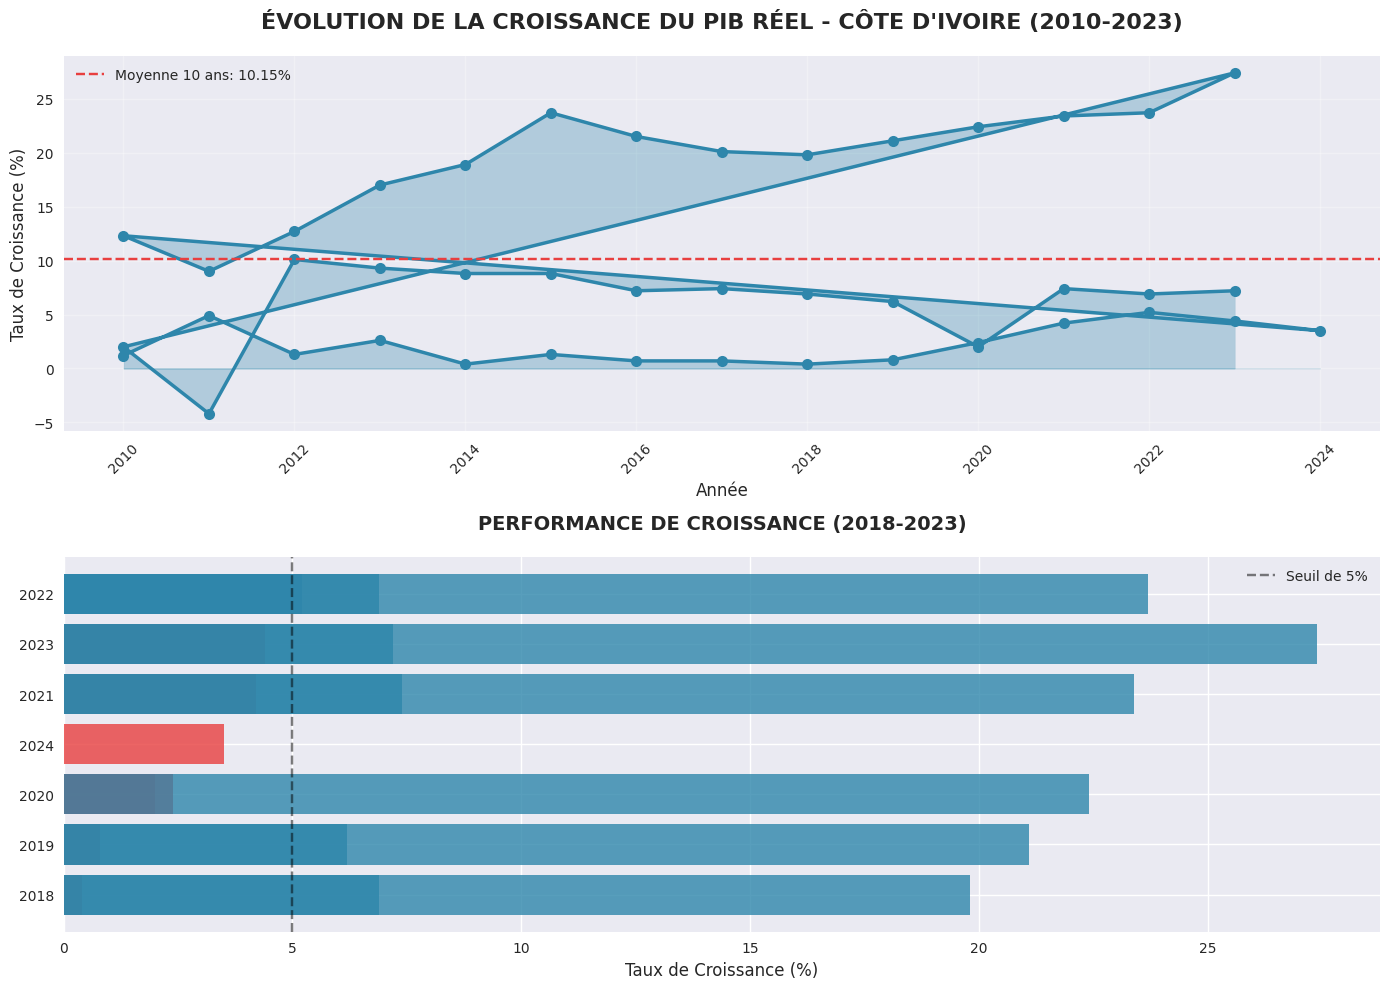

In [29]:
print("\n4. 🎨 CRÉATION DES VISUALISATIONS")
# Figure avec 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
# Graphique 1 : Évolution chronologique
ax1.plot(df['annee'], df['taux_croissance'], 
         marker='o', linewidth=2.5, markersize=8, color='#2E86AB')
ax1.fill_between(df['annee'], df['taux_croissance'], 
                alpha=0.3, color='#2E86AB')
ax1.axhline(y=moyenne_10ans, color='#E83F3F', linestyle='--', 
           label=f'Moyenne 10 ans: {moyenne_10ans:.2f}%')
ax1.set_title('ÉVOLUTION DE LA CROISSANCE DU PIB RÉEL - CÔTE D\'IVOIRE (2010-2023)', 
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Année', fontsize=12)
ax1.set_ylabel('Taux de Croissance (%)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Graphique 2 : Barres horizontales pour la période récente
df_recent = df[df['annee'] >= 2018].sort_values('taux_croissance')
colors = ['#E83F3F' if x < 5 else '#2E86AB' for x in df_recent['taux_croissance']]
ax2.barh(df_recent['annee'].astype(str), df_recent['taux_croissance'], 
         color=colors, alpha=0.8)
ax2.set_title('PERFORMANCE DE CROISSANCE (2018-2023)', 
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Taux de Croissance (%)', fontsize=12)
ax2.axvline(x=5, color='black', linestyle='--', alpha=0.5, label='Seuil de 5%')
ax2.legend()

plt.tight_layout()
plt.savefig('../results/analyse_croissance_pib.png', 
            dpi=300, bbox_inches='tight')
print("   ✅ Graphique sauvegardé sous '../results/analyse_croissance_pib.png'")

11. ANALYSE CONJONCTURELLE

In [24]:
print("\n5. 📋 ANALYSE CONJONCTURELLE")
print("   📌 Période de forte croissance (>7%) :")
periodes_fortes = df[df['taux_croissance'] > 7]
for _, row in periodes_fortes.iterrows():
    print(f"     - {row['annee']} : {row['taux_croissance']}%")

print("\n   📌 Période de croissance modérée (5-7%) :")
periodes_moderees = df[(df['taux_croissance'] >= 5) & (df['taux_croissance'] <= 7)]
for _, row in periodes_moderees.iterrows():
    print(f"     - {row['annee']} : {row['taux_croissance']}%")

print("\n   📌 Période de faible croissance (<5%) :")
periodes_faibles = df[df['taux_croissance'] < 5]
for _, row in periodes_faibles.iterrows():
    print(f"     - {row['annee']} : {row['taux_croissance']}%")

# 6. INDICATEURS DE PERFORMANCE
print("\n6. 🎯 INDICATEURS DE PERFORMANCE ÉCONOMIQUE")
volatilite = df['taux_croissance'].std()
print(f"   📊 Volatilité de la croissance : {volatilite:.2f}%")

tendance = np.polyfit(df['annee'], df['taux_croissance'], 1)[0]
print(f"   📈 Tendance générale : {'haussière' if tendance > 0 else 'baissière'} ({tendance:.3f}% par an)")


5. 📋 ANALYSE CONJONCTURELLE
   📌 Période de forte croissance (>7%) :
     - 2023 : 7.2%
     - 2021 : 7.4%
     - 2017 : 7.4%
     - 2016 : 7.2%
     - 2015 : 8.8%
     - 2014 : 8.8%
     - 2013 : 9.3%
     - 2012 : 10.1%
     - 2023 : 27.4%
     - 2022 : 23.7%
     - 2021 : 23.4%
     - 2020 : 22.4%
     - 2019 : 21.1%
     - 2018 : 19.8%
     - 2017 : 20.1%
     - 2016 : 21.5%
     - 2015 : 23.7%
     - 2014 : 18.9%
     - 2013 : 17.0%
     - 2012 : 12.7%
     - 2011 : 9.0%
     - 2010 : 12.3%

   📌 Période de croissance modérée (5-7%) :
     - 2022 : 6.9%
     - 2019 : 6.2%
     - 2018 : 6.9%
     - 2022 : 5.2%

   📌 Période de faible croissance (<5%) :
     - 2020 : 2.0%
     - 2011 : -4.2%
     - 2010 : 2.0%
     - 2024 : 3.5%
     - 2023 : 4.4%
     - 2021 : 4.2%
     - 2020 : 2.4%
     - 2019 : 0.8%
     - 2018 : 0.4%
     - 2017 : 0.7%
     - 2016 : 0.7%
     - 2015 : 1.3%
     - 2014 : 0.4%
     - 2013 : 2.6%
     - 2012 : 1.3%
     - 2011 : 4.9%
     - 2010 : 1.2%

6. 🎯 INDI

12. SAUVEGARDE DES RÉSULTATS

In [27]:
print("\n7. 💾 SAUVEGARDE DES RÉSULTATS")
df.to_csv('../results/donnees_croissance_analysees.csv', index=False, encoding='utf-8-sig')
print("   ✅ Données analysées sauvegardées sous '../results/donnees_croissance_analysees.csv'")
print("\n" + "=" * 60)
print("✅ ANALYSE TERMINÉE AVEC SUCCÈS!")
print("LA CÔTE D'IVOIRE MAINTIENT UNE CROISSANCE ROBUSTE!")
print("=" * 60)


7. 💾 SAUVEGARDE DES RÉSULTATS
   ✅ Données analysées sauvegardées sous '../results/donnees_croissance_analysees.csv'

✅ ANALYSE TERMINÉE AVEC SUCCÈS!
LA CÔTE D'IVOIRE MAINTIENT UNE CROISSANCE ROBUSTE!
